# DBS Associat MLE Assessment
## Section A

### Question 1
#### (a) Formulate a hypothesis between x, y, f_xy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()    #set seaborn format

In [2]:
# load data
df = pd.read_csv('./data/section_a_question_1.csv')

In [3]:
# rough sample
df.sample(10)

,x,y,f_xy
48,0.522733,0.427541,0.621753
23,0.311711,0.520068,0.656929
34,0.074551,0.986887,0.071691
14,0.592415,0.046450,1.633664
9,0.431945,0.291229,1.023033
45,0.119594,0.713245,0.479477
12,0.456070,0.785176,0.156015
13,0.199674,0.514234,0.948290
28,0.088493,0.195983,3.191019
26,0.939499,0.894827,0.014130


In [4]:
df.shape

(50, 3)

There are 50 data points with 3 columns.


In the sample 

    0 <   `x`    < 1,    $\bar{x}$ = 0.441
    
    0 <   `y`    < 1,    $\bar{y}$ = 0.500

    0 < `f(x,y)` < 6,    f(x,y)ave = 0.944




In [6]:
df.describe()

,x,y,f_xy
count,50.000000,50.000000,50.000000
mean,0.440717,0.499645,0.944342
std,0.301266,0.293723,1.055559
min,0.005522,0.046450,0.014130
25%,0.162470,0.202122,0.228495
50%,0.381609,0.504706,0.570853
75%,0.723919,0.763601,1.189915
max,0.969585,0.986887,5.134299


Text(0.5, 1.0, 'f_xy distribution')

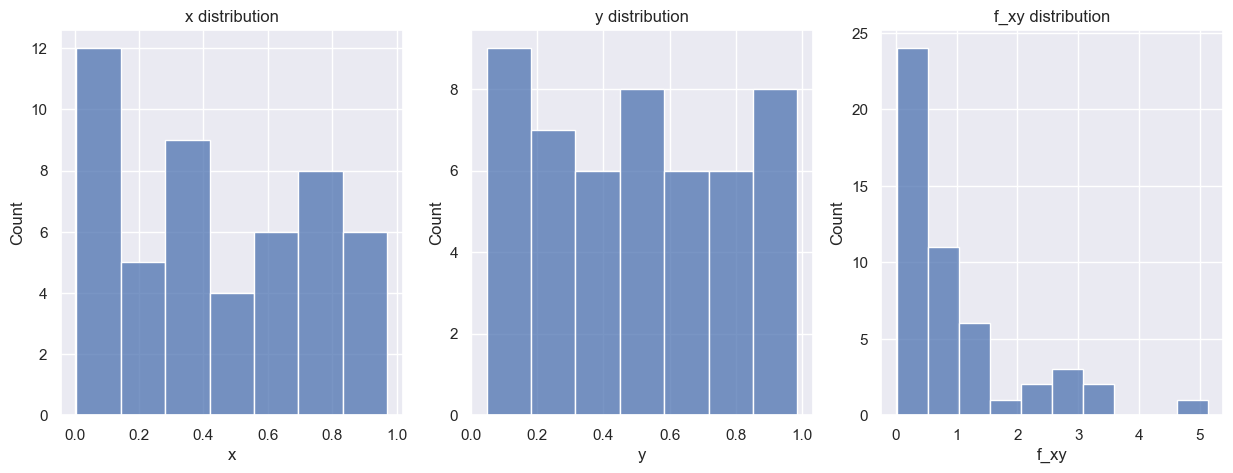

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(df['x'],ax=axes[0])
axes[0].set_title('x distribution')
sns.histplot(df['y'],ax=axes[1])
axes[1].set_title('y distribution')
sns.histplot(df['f_xy'],ax=axes[2])
axes[2].set_title('f_xy distribution')

There is slight imbalance to X with more data points near 0. Also more data points of f_xy near 0 too. There may be some 'pull' of f_xy on x and y. Use a scatterplot to better visualise

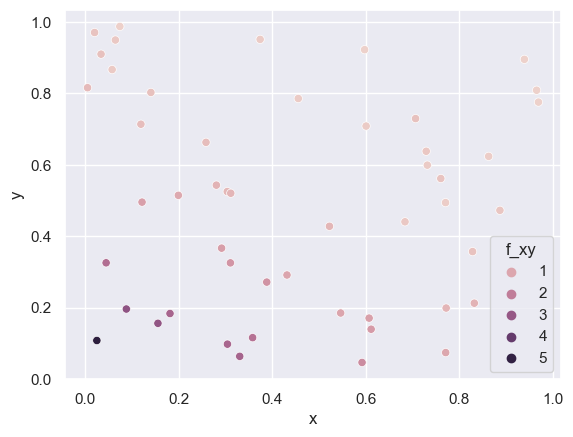

In [8]:
sns.scatterplot(x='x', y='y', data=df, hue='f_xy');

Using intuition about the resultant f_xy tending to 0 and also the radial gradient of f_xy, I will estimate that f_xy is proportionate to its distance to 0 on the x-y dimension. We will use distance equation 

In [9]:
df['hyp'] = df.x**2 + df.y**2
df['hyp'] = np.sqrt(df['hyp'])

In [10]:
pd.concat(    # displaying the difference in values
    [df,
     df[['f_xy','hyp']].diff().rename(columns={'f_xy':'f_diff','hyp':'h_diff'})
    ], axis=1
).head()

,x,y,f_xy,hyp,f_diff,h_diff
0,0.374540,0.950714,0.157131,1.021831,NaN,NaN
1,0.731994,0.598658,0.171344,0.945625,0.014213,-0.076205
2,0.156019,0.155995,3.129805,0.220627,2.958461,-0.724999
3,0.058084,0.866176,0.204051,0.868121,-2.925754,0.647495
4,0.601115,0.708073,0.169634,0.928820,-0.034416,0.060698


`hyp` have similar patterns to `f_xy`
- Taking index 0, 1 we can see that values are *close* to each other 
- Taking index 1, 2 we can see that is *far* apart relative to 0, 1


However,
- from index 0, 1 and 1, 2 `f_xy` is increasing but hyp is *decreasing*


Due to this difference, we will assume an inverse relationship 

In [13]:
df['hyp'] = 1/df['hyp']
df.head()

,x,y,f_xy,hyp
0,0.374540,0.950714,0.157131,1.021831
1,0.731994,0.598658,0.171344,0.945625
2,0.156019,0.155995,3.129805,0.220627
3,0.058084,0.866176,0.204051,0.868121
4,0.601115,0.708073,0.169634,0.928820


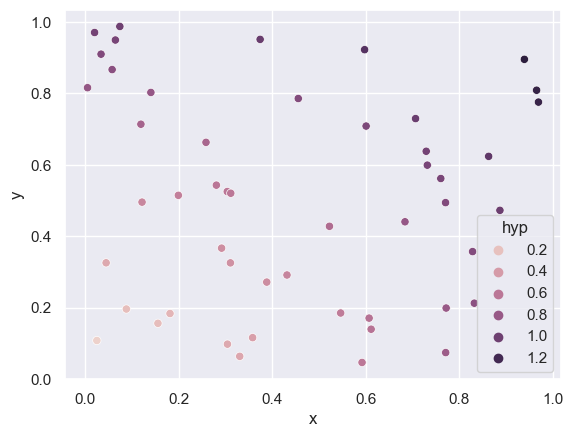

In [14]:
sns.scatterplot(x='x', y='y', data=df, hue='hyp');

Made a plot below as a sanity check. `hyp` and `f_xy` now look to have a closer relationship. There may be some bias or scaling involved. So I will assume the function below as my hypothesis


f_xy proportionate to 1/sqrt(x^2+y^2)


i.e. f_xy = a/sqrt(x^2+y^2) + b


#### (b) Justify your choice of function and provide best guess for unknown params
In this case we will use OLS using above hypothesis and check R, F score and take the estimate for a and b.


Intuition is that since datapoints are centering around origin, there is no transform away from origin and b = 0. We can test this first.

In [15]:
import statsmodels.api as sm

#prepare x variable as 1/sqrt(x^2+y^2)
x = 1/np.sqrt(df.x**2+df.y**2)
y = df.f_xy

result = sm.OLS(y, x).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   f_xy   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              568.3
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    1.30e-28
Time:                        08:14:47   Log-Likelihood:                         -24.734
No. Observations:                  50   AIC:                                      51.47
Df Residuals:                      49   BIC:                                      53.38
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6011      0.025     23.838      0.000       0.550       0.652
==============================================================================
Omnibus:                        9.696   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.922
Skew:                           1.087   Prob(JB):                      0.00701
Kurtosis:                       3.199   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R is more than 90% which is a good sign. F statistic is large indicating a significance of this relationship. We also test if b has a possible value in regression nbelow

In [16]:
x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   f_xy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     417.6
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.51e-25
Time:                        08:14:53   Log-Likelihood:                -16.343
No. Observations:                  50   AIC:                             36.69
Df Residuals:                      48   BIC:                             40.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3486      0.080     -4.376      0.000      -0.509      -0.188
0              0.7242      0.035     20.435      0.000       0.653       0.795
==============================================================================
Omnibus:                        6.115   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.578
Skew:                           0.405   Prob(JB):                       0.0373
Kurtosis:                       4.582   Cond. No.                         4.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To avoid some risk of overfitting we can take the simpler regression above and take the function to be 


>f_xy ~ 	0.6011/sqrt(x^2+y^2)
>
>
>with a significant R value and p-value < 0.001.


#### (c)(i) Find the PDF of W = Y/X

In [19]:
import sympy as sp

# Define symbols
x, y, w = sp.symbols('x y w', real=True, positive=True)

# Define the joint PDF function
f_xy = 0.6011 / sp.sqrt(x**2 + y**2)

# Define the transformation function
W = y / x

# Perform the transformation
f_W = f_xy.subs(y, W*x) / sp.Abs(sp.diff(W, x))

# Print the result
print("PDF of W:")
sp.pprint(f_W.simplify())

PDF of W:
          2   
  0.6011⋅x    
──────────────
     _________
    ╱  2    2 
y⋅╲╱  x  + y  


#### (c)(ii) Find P(X < Y)
Since W = Y/X,


Then X < Y ==> W > 1 


and we will find CDF of P(W>1)

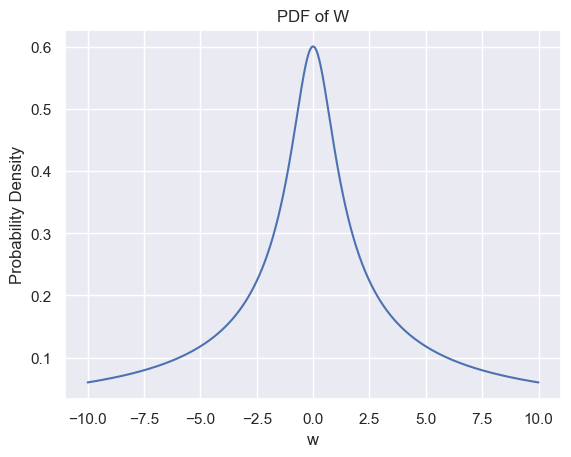

In [20]:
# Define the range of w values
w_values = np.linspace(-10, 10, 1000)  # Adjust the range as needed

# Define the PDF function for W
def f_W(w):
    return 0.6011 / np.sqrt(1 + w**2)

# Evaluate the PDF values for the range of w values
pdf_values = f_W(w_values)

# Plot the PDF
plt.plot(w_values, pdf_values)
plt.xlabel('w')
plt.ylabel('Probability Density')
plt.title('PDF of W')
plt.grid(True)
plt.show()

In [21]:
# Define symbols
w = sp.symbols('w', real=True, positive=True)

# Define the PDF function for W
f_W = 0.6011 / sp.sqrt(1 + w**2)

# Compute the probability P(W > 1)
probability = sp.integrate(f_W, (w, 1, sp.oo))

# Print the result
print("P(W > 1):", probability.evalf())

P(W > 1): oo


In [22]:
# Compute the probability P(0 < W < 1)
probability = sp.integrate(f_W, (w, 0, 1))

# Print the result
print("P(0 < W < 1):", probability.evalf())

P(0 < W < 1): 0.529793663157447


>The integral of the function is not 1, indicating it is not a valid PDF. This may be due to incorrect estimate of f_xy. Otherwise current function of W still requires normalisation so that CDF of -oo to oo is 1


>However, if the distribution was symmetric and centralised around W = 0, then we can assume 50% CDP on the right then deduct P(0<W<1) to get P(W>1) == P(X<Y).

### Question 2
#### (a)(i) Use Majority Voting to find the expected error rate of the ensemble
Some definitions:
- Error rate is all misclassified datapoints over all predictions. Error rate = 1 - accuracy = FP + FN) / (TP + TN + FP + FN)
- Majority Voting for same dataset, each algorithms predicts and casts  votes of outcome with final prediction determined by the majority's decision.


We can calculate probability of all erroneous scenarios occuring assuming predictors are independent by calculating the cumulative probability of all erroneous permutations (or all the ways the ensemble predictor is incorrect). 


Predictor = (P1, P2, P3) and where 0 = incorrect, 1 = correct,

    Universe of outcomes = {
    (0, 0, 0)
    (0, 0, 1)
    (0, 1, 0)
    (0, 1, 1)
    (1, 0, 0)
    (1, 0, 1)
    (1, 1, 0)
    (1, 1, 1)
    }


    there are 4 scenarios out of 8 lead to erroneous results 
    {(0, 0, 0)
    (0, 0, 1)
    (0, 1, 0)
    (1, 0, 0)}

In [23]:
# Define the data
data = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0)]

# Create a DataFrame
df = pd.DataFrame(data, columns=['C1', 'C2', 'C3'])

# Define the constants
error_rates = [0.1, 0.3, 0.3]

# Apply transformations
for i, col in enumerate(df.columns):
    df[f'New_{col}'] = df[col].apply(
        lambda x: error_rates[i] if x == 0 else x * (1 - error_rates[i]))

df.columns = ['C1', 'C2', 'C3', 'p1', 'p2', 'p3']

# Find joint probabilities of incorrect prediction
df['perror'] = df.p1*df.p2*df.p3

print(df)
print(f'\n\nExpected error rate of the ensemble: \
      {df.perror.sum()*100:.1f}%')

   C1  C2  C3   p1   p2   p3  perror
0   0   0   0  0.1  0.3  0.3   0.009
1   0   0   1  0.1  0.3  0.7   0.021
2   0   1   0  0.1  0.7  0.3   0.021
3   1   0   0  0.9  0.3  0.3   0.081


Expected error rate of the ensemble:       13.2%


> The ensemble error rate is less than either predictor 2 or 3 but more than predictor 1. There is a small chance all 3 predictors are wrong (at 0.9%) but cases where only 2 are wrong cumulates error more than 12%.

#### (a)(ii) and show the error propagation diagrammatically

In [24]:
# Define the constants
likelihood_of_error = [0.1, 0.3, 0.3]

# Generate random samples
samples = np.zeros((10_000, 3))

for i, prob in enumerate(likelihood_of_error):
    samples[:, i] = np.random.choice([0, 1], size=10_000, p=[prob, 1 - prob])

# Create a DataFrame from the samples
df = pd.DataFrame(samples, columns=['p1', 'p2', 'p3'])

# Calculate the mode of the first three columns
df['ensemble'] = df[['p1', 'p2', 'p3']].mode(axis=1)

# Print the DataFrame with the prediction column
print(df)


       p1   p2   p3  ensemble
0     1.0  0.0  0.0       0.0
1     1.0  1.0  1.0       1.0
2     1.0  1.0  1.0       1.0
3     1.0  1.0  1.0       1.0
4     1.0  1.0  1.0       1.0
...   ...  ...  ...       ...
9995  1.0  1.0  1.0       1.0
9996  1.0  1.0  0.0       1.0
9997  1.0  0.0  1.0       1.0
9998  1.0  1.0  1.0       1.0
9999  1.0  0.0  0.0       0.0

[10000 rows x 4 columns]


In [25]:
errors = 1-df.mean()

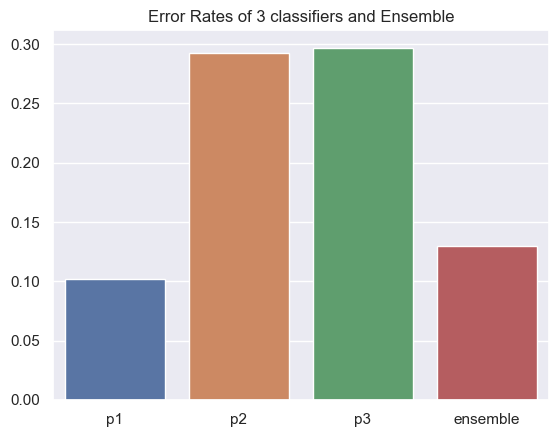

In [26]:
sns.barplot(x=errors.index, y=errors.values)
plt.title('Error Rates of 3 classifiers and Ensemble');

In [22]:
errors

p1          0.1038
p2          0.3014
p3          0.2911
ensemble    0.1306
dtype: float64

C1 --> p1 | 
C2 --> p2 | 
C3 --> p3 


mode(p1, p2, p3) --> prediction

---

#### (b) What can be inferred if the assumption of independence is relaxed on the errors


If that is the case then calculations in part A do not apply and the error rate of the ensemble is best to be taken stochastically. Below are the reasons that the analysis does not hold:
1. conditional probability of an error scenario is not the product of the error rates for each predictor. E.g. for (1, 0, 0) error rate of 0.9*0.3*0.3 is not relevant. This is because in each prediction, the outcome of one predictor will affect another so the expected error rates are not expected to remain as stated.
2. In ii we assumed the rate of each predictor remains the same throughout the experiment. However with dependency, this assumption does not hold, so we cannot use the given error rates and more data (on independent variables) is needed to estimated the expected rate of error in each scenario.

Confounding: If error rates of any predictor is conditional on the error of another predictor then the error rate of the ensemble is not determined by the predictors independently. When calculating the ensemble error rate above, we took the assumption that all predictors are independent. Since an error of a predictor can effect BOTH the error in another predictor and our computation of ensemble error then it is confounding.


Autocorrelation: If errors are correlated over time (autocorrelation), it indicates that the current error term is related to the past error terms. This violates the assumption of independence in time series data and may require time series modeling techniques to account for the autocorrelation structure.




> In conclusion the accuracy of the model cannot be explained with aggregated accuracy and precision using only the individual predictor error rates. To make the existing model to be applicable, there must be sufficient large sample dataset to represent the population and universe of permutations. Or the predictive capability must be limited a known set of range of dependent variables before error rates and accuracy can be taken at face value. Else the model must consider each individual predictor as independent variables also. The easiest alternative would be to run experiments with dependent variables within the test universe then compute the error of the ensemble instead. This will give the stochastic error within the relevant case scenarios applicable.

---

### Question 3

In [27]:
# make train data as df for faster calculations
train = [
    ('s', 42.5, 'n', 'f', 'n'),
    ('s', 42.5, 'h', 't', 'n'),
    (None, 42.5, 'h', 'f', 'y'),
    ('r', None , 'h', 'f', 'y'),
    ('r', 22.8, 'n', 'f', 'y'),
    ('r', 15.4, 'n', 't', 'n')
]

df_train = pd.DataFrame(train, columns=['x1', 'x2', 'x3', 'x4', 'y'])

df_train

,x1,x2,x3,x4,y
0,s,42.5,n,f,n
1,s,42.5,h,t,n
2,None,42.5,h,f,y
3,r,NaN,h,f,y
4,r,22.8,n,f,y
5,r,15.4,n,t,n


# make calculations for the first test data
We will take the general Bayes theorem per below
![bayes](http://mathurl.com/yd5wgr73.png)

![bayes2](https://miro.medium.com/v2/resize:fit:640/format:webp/1*1eTZdwSU6d4ApGNlvp9zHw.png)

![bayes3](https://miro.medium.com/v2/resize:fit:640/format:webp/1*7JKaSvDoyQOwGzGqCG-QDQ.png)


---
    P(X | y=Y) = P(x1 | Y) X P(x2 | Y) X P(x3 | Y) X P(x4 | Y)

---

##### For first test data x = ('o', 25.0, 'n', 't')

We calculate for both outcomes 'y' and 'n'. `x1=O` is not present. We will add [pseudocount](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#:~:text=incorporate%20a%20small%2Dsample%20correction%2C%20called%20pseudocount%2C%20in%20all%20probability%20estimates%20such%20that%20no%20probability%20is%20ever%20set%20to%20be%20exactly%20zero.%20This%20way%20of%20regularizing%20naive%20Bayes%20is%20called%20Laplace%20smoothing%20when%20the%20pseudocount%20is%20one%2C%20and%20Lidstone%20smoothing%20in%20the%20general%20case.) to incorporate a small-sample correction, called pseudocount, in all probability estimates such that no probability is ever set to be exactly zero. This way of regularizing naive Bayes is called Laplace smoothing when the pseudocount is one, and Lidstone smoothing in the general case.


     P(X|y=Y) = P(x1='o'|Y) 
                X P(x2=25.0|Y) 
                X P(x3='n'|Y) 
                X P(x4='t'|Y)
                
                

- `P(x1='o'|Y)` = 1/5    # 1 'o', 1 's', 3 'r'
- `P(x2=25.0|Y)` = 0.0246 (computation further below)
- `P(x3='n'|Y)` = 2/5    # 2 'n', 3 'h'
- `P(x4='t'|Y)` = 1/5    # 4 'f', 1 't'
              
              
              
                
        P(X|y=N) = P(x1='o'|N) 
                X P(x2=25.0|N) 
                X P(x3='n'|N) 
                X P(x4='t'|N)



- `P(x1='o'|N)` = 1/6    # 1 'o', 3 's', 2'r'
- `P(x2=25.0|N)` = 0.0220 (computation further below)
- `P(x3='n'|N)` = 2/5    # 3 'n', 2 'h'
- `P(x4='t'|N)` = 3/5    # 3 't', 2 'f'

In [28]:
df_train[df_train['y']=='y']

,x1,x2,x3,x4,y
2,None,42.5,h,f,y
3,r,NaN,h,f,y
4,r,22.8,n,f,y


In [29]:
 df_train[df_train['y']=='n']

,x1,x2,x3,x4,y
0,s,42.5,n,f,n
1,s,42.5,h,t,n
5,r,15.4,n,t,n


In [30]:
# finding mean and variance of x2 when y='y'
# ignoe NaN values during calculation
x2_mean_y = df_train[df_train['y']=='y']['x2'].mean()
x2_var_y = df_train[df_train['y']=='y']['x2'].var()

# finding mean and variance of x2 when y='n'
x2_mean_n = df_train[df_train['y']=='n']['x2'].mean()
x2_var_n = df_train[df_train['y']=='n']['x2'].var()

# finding conditional Gaussian probability for test1
# using the above means and vars
p_x2_y_test1 = 1 / np.sqrt(2 * np.pi * x2_var_y) * \
                np.exp(-(25 - x2_mean_y) ** 2 / (2 * x2_var_y))
p_x2_n_test1 = 1 / np.sqrt(2 * np.pi * x2_var_n) * \
                np.exp(-(25 - x2_mean_n) ** 2 / (2 * x2_var_n))
p_x2_y_test1, p_x2_n_test1

(0.02463025322518082, 0.022024970873542677)

In [31]:
# calculating P(X|y=Y), P(X|y=N) for test1
p_x_y_test1 = 1/5 * p_x2_y_test1 * 2/5 * 1/5
p_x_n_test1 = 1/6 * p_x2_n_test1 * 2/5 * 3/5

# multiply by prior and compare P(X|y=Y) to P(X|y=N)
p_x_y_test1*3/6, p_x_n_test1*3/6

(0.00019704202580144654, 0.00044049941747085347)

> Since `P(X|Y) * P(Y) < P(X|N) * P(N)`, 
>
>
>Then predict that the first test term will be `N`

##### For second test data x = ('s', 36.4, None, 'f')

We calculate for both outcomes 'y' and 'n'. We remove `x3` since there is no value and no information can be taken from that variable.

     P(X|y=Y) = P(x1='s'|Y) 
                X P(x2=36.4|Y) 
                X P(x4='f'|Y)
                

- `P(x1='s'|Y)` = 1/5    # 1 'o', 1 's', 3 'r'
- `P(x2=36.4|Y)` = 0.0276 (computation further below)
- `P(x4='f'|Y)` = 4/5    # 4 'f', 1 't'
              
              
              

         P(X|y=N) = P(x1='s'|N) 
                    X P(x2=36.4|N) 
                    X P(x4='f'|N)



- `P(x1='s'|N)` = 3/6    # 1 'o', 3 's', 2 'r'
- `P(x2=36.4|N)` = 0.0251 (computation further below)
- `P(x4='f'|N)` = 2/5    # 3 't', 2 'f'

In [32]:
# finding conditional Gaussian probability for test2
p_x2_y_test2 = 1 / np.sqrt(2 * np.pi * x2_var_y) * \
                np.exp(-(36.4 - x2_mean_y) ** 2 / (2 * x2_var_y))
p_x2_n_test2 = 1 / np.sqrt(2 * np.pi * x2_var_n) * \
                np.exp(-(36.4 - x2_mean_n) ** 2 / (2 * x2_var_n))
p_x2_y_test2, p_x2_n_test2

(0.027619900587299257, 0.025053535726665115)

In [33]:
# calculating P(X|y=Y),P(X|y=N) for test2
p_x_y_test2 = 1/5 * p_x2_y_test2 * 4/5
p_x_n_test2 = 3/6 * p_x2_n_test2 * 2/5

# multiply by prior and compare P(X|y=Y) to P(X|y=N)
p_x_y_test2*3/6, p_x_n_test2*3/6

(0.002209592046983941, 0.0025053535726665115)

> Since `P(X|Y) * P(Y) < P(X|N) * P(N)`, 
> 
> 
> Then predict that the second test term will be `N`

---

### Question 4

(a) Write `get_indices`

In [111]:
data_a = [('id1', 'addr1', 'pw1'), ('idz', 'addrz', 'pwz'), ('idx', 'addr1', 'pwx'), ('idy', 'addry', 'pwx')]

In [112]:
data_a

[('id1', 'addr1', 'pw1'),
 ('idz', 'addrz', 'pwz'),
 ('idx', 'addr1', 'pwx'),
 ('idy', 'addry', 'pwx')]

In [126]:
def get_indices(data: list) -> list:
    """
    Takes a list of tuples and returns a 2D list of indices.
    Each sub-list corresponds to the indices of all rows pointing to the same person.
    Rows point to the same person if any of their column entries are the same.

    Parameters
    ----------
    data : list of tuples
        The input data where each tuple represents a row.

    Returns
    -------
    list
        A 2D list of indices where each sub-list contains indices of rows pointing
        to the same person.

    Complexity
    ----------
    Time: O(n*m^2) where n is the number of rows and m is the average length of a row.
    Space: O(n*m) where n is the number of rows and m is the average length of a row.

    Raises
    ------
    ValueError
        If the input data is empty.
        If any tuple contains null or empty values.

    """
    if not data:
        raise ValueError("Input data cannot be empty")

    for row in data:
        if any(value is None or value == "" for value in row):
            raise ValueError("Tuples in input data cannot contain null or empty values")

    value_sets = []
    row_sets = []

    # Collect all distinct values for each column into `value_sets`
    # Collect all row indices with the same values in a column into `row_sets`
    for col in range(len(data[0])):
        temp1 = set()
        for row in range(len(data)):
            temp1.add(data[row][col])
        value_sets.append(temp1)

        for value in temp1:
            temp2 = set()
            for row in range(len(data)):
                if data[row][col] == value:
                    temp2.add(row)
            if temp2 not in row_sets:
                row_sets.append(temp2)

    # Reduce `row_sets` by joining sets that intersect
    reduced_sets = row_sets

    while sum(len(s) for s in reduced_sets) > len(data):  # check if fully reduced
        tmp1 = reduced_sets[:]
        reduced_sets = []
        for s in tmp1:
            joined = False
            for r in reduced_sets:
                if r.intersection(s):
                    r.update(s)
                    joined = True
                    break
            if not joined:
                reduced_sets.append(s)

    return reduced_sets


In [128]:
get_indices(data_a)

[{0, 2, 3}, {1}]

In [164]:
def similarity_score(str1: str, str2: str) -> float:
    """
    Calculates the maximum similarity score between two strings.
    Maximum similarity is the longest sequential string from the short
    string that is present in the long string

    Parameters
    ----------
    str1 : str
        First string for comparison.
    str2 : str
        Second string for comparison.

    Returns
    -------
    float
        Maximum similarity score between two strings.

    Raises
    ------
    ValueError
        If either str1 or str2 is an empty string.

    Complexity
    ----------
    Time: O(min(n, m)), where n and m are the lengths of the input strings.
    Space: O(1).
    """
    if not str1 or not str2:
        raise ValueError("Input strings cannot be empty")

    num = 0
    tmp = ''
    
    # Set longer and shorter strings
    if len(str1) > len(str2):
        l_str = str1
        s_str = str2
        den = len(l_str)
    else:
        l_str = str2
        s_str = str1
        den = len(l_str)
    
    tmp = len(s_str)  # Set current search size as short string
    while tmp > 0:    # Search from longest to shortest character
        for i in range(len(s_str) - tmp + 1):
            combination = s_str[i:i + tmp]
            if combination in l_str:
                return tmp / len(l_str)
        tmp -= 1
    return 0


# Example usage:
try:
    result1 = similarity_score("quiet_otter", "otter_quiet")
    result2 = similarity_score("similar", "sims")
    result3 = similarity_score("abc", "def")
    print(result1, result2, result3)
except ValueError as e:
    print("Error:", e)


0.45454545454545453 0.42857142857142855 0


In [162]:
data_b = [('id1', 'name1', 'pw1'), ('id1', 'name2', 'pw2'), ('id3', 'name3', 'pw3'), ('id3', 'name4', 'ppp')]

In [217]:
from itertools import combinations

def calculate_similarity(data: list, idx: int) -> list:
    """
    Calculate similarity scores for pairs of texts in the specified column.

    Parameters
    ----------
    data : list
        List of data containing texts.
    idx : int
        Index of the column containing the texts.

    Returns
    -------
    list
        List of similarity scores for each pair of texts.

    Raises
    ------
    ValueError
        If the column index is out of range.

    Complexity
    ----------
    Time: O(n^2), where n is the number of unique persons in the data.
    Space: O(n), where n is the number of unique persons in the data.
    """
    results = []
    try:
        people = sorted(get_indices(data_b), key=min)
    except Exception as e:
        raise ValueError("Error occurred while identifying same persons") from e
    
    for person in people:
        score = 1
        if len(person) <= 1:    # Only one entry gives a score of 0
            results.append(score)
            continue
        for pair in list(combinations(person, 2)):    # Check all combinations of rows
            score *= similarity_score(data[pair[0]][idx], data[pair[1]][idx])
        results.append(score)
            
    return results

# Example usage:
calculate_similarity(data_b, 2)


[0.6666666666666666, 0.3333333333333333]

### Question 5

In [3]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import numpy as np

In [4]:
X,Y=make_circles(n_samples=1000,noise=0.1)

In [5]:
print(X.shape,Y.shape)

(1000, 2) (1000,)


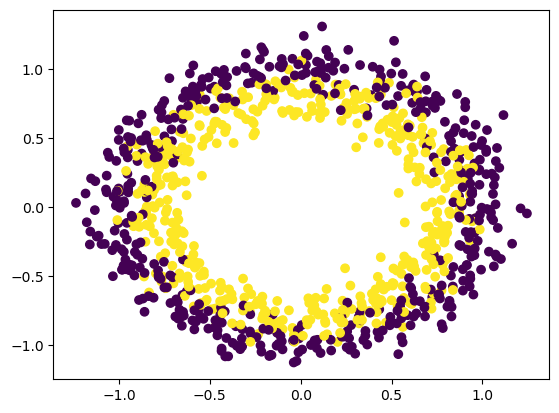

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
# Combine X and Y into a single array along the columns axis
data_combined = np.column_stack((Y, X))

# Shuffle the combined data along the rows axis
np.random.shuffle(data_combined)

m, n = data_combined.shape

# make dev data
data_dev = data_combined[0:200]
Y_dev = data_dev[:,0]
X_dev = data_dev[:,1:n]

# make train data
data_train = data_combined[200:]
Y_train = data_train[:,0]
X_train = data_train[:,1:n]
_,m_train = X_train.shape

In [8]:
data_combined.shape

(1000, 3)

In [9]:
Y_dev.shape, X_dev.shape, Y_train.shape, X_train.shape

((200,), (200, 2), (800,), (800, 2))

In [10]:
Y_dev[0], X_dev[0], Y_train[0], X_train[0]

(0.0, array([0.14079456, 1.13747652]), 1.0, array([0.57706204, 0.52888865]))

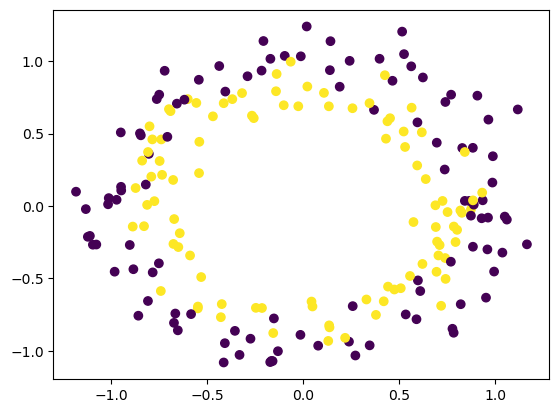

In [11]:
plt.scatter(X_dev[:,0],X_dev[:,1],c=Y_dev)
plt.show()

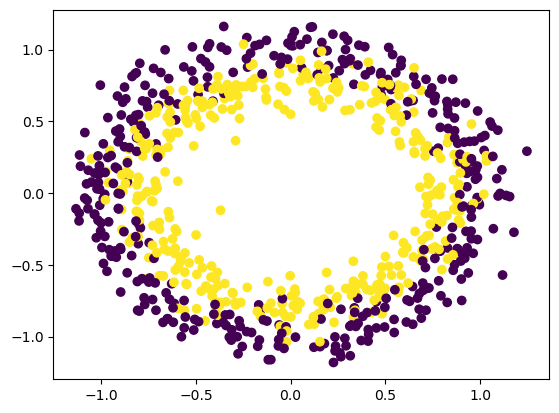

In [10]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

In [11]:
ls = [np.zeros((3,)), np.zeros((3,))]

for arr in ls:
    print(arr)

[0. 0. 0.]
[0. 0. 0.]


In [12]:
params = {'W':[np.zeros((4,)), np.zeros((4,))],'A':[np.zeros((3,)), np.zeros((2,))]}
params['W'][0]

array([0., 0., 0., 0.])

In [79]:
"""
Functions for forward prop
"""
def init_params():
    W1 = np.random.rand(10, 2) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    W4 = np.random.rand(2, 10) - 0.5
    b4 = np.random.rand(2, 1) - 0.5
    return W1, b1, W2, b2, W3, b3, W4, b4

def ReLU(Z):    # returns Z for Z > 0
    return np.maximum(Z, 0)

def softmax(Z):    # returns a positive no. less than 1
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X):
    Z1 = W1.dot(X.T) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = ReLU(Z3)
    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4

"""
Functions for Back Prop
"""
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 2))
    one_hot_Y[np.arange(Y.size).astype(int), \
              Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, \
                  W3, W4, X, Y):
    one_hot_Y = one_hot(Y)    # loss
    dZ4 = A4 - one_hot_Y
    dW4 = 1 / m * dZ4.dot(A3.T)
    db4 = 1 / m * np.sum(dZ4)
    dZ3 = W4.T.dot(dZ4) * ReLU_deriv(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3, dW4, db4

def update_params(W1, b1, W2, b2, W3, b3, W4, b4, dW1, \
                  db1, dW2, db2, dW3, db3, dW4, db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    W4 = W4 - alpha * dW4
    b4 = b4 - alpha * db4
    return W1, b1, W2, b2, W3, b3, W4, b4

In [80]:
def get_predictions(A4):
    return np.argmax(A4,0)

def get_accuracy(predictions, Y):
    print(predictions)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X_train)
        dW1, db1, dW2, db2, dW3, db3, dW4, db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, \
                                              W3, W4, X_train, Y_train)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2, W3, b3, W4, b4, dW1, \
                                      db1, dW2, db2, dW3, db3, dW4, db4, alpha)
        if i % 1000 == 0:
            print("Iteration: ", i)
            print("Accuracy:  ", get_accuracy(get_predictions(A4), Y))
    return W1, b1, W2, b2, W3, b3, W4, b4

In [81]:
W1, b1, W2, b2, W3, b3, W4, b4 = gradient_descent(X, Y, .15, 50_000)

Iteration:  0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 

/var/folders/h2/r7qn2m9n1zb6y_0q191gdqth0000gn/T/ipykernel_79537/2804508761.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.sum(predictions == Y) / Y.size


Iteration:  1000
[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1

Iteration:  6000
[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1

Iteration:  11000
[1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

Iteration:  16000
[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

Iteration:  21000
[1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

Iteration:  26000
[1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

Iteration:  31000
[1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

Iteration:  36000
[1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

Iteration:  41000
[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

Iteration:  46000
[1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 

In [82]:
def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X_train)
    predictions = get_predictions(A4)
    return A4

In [111]:
X.shape

(1000, 2)

In [10]:
[*range(9)]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [1]:
import sys
sys.path.insert(0, 'src')  # Add the 'src' directory to the Python path
from n import NeuralNet  # Import the module


In [2]:
mdl = NeuralNet(
        hidden_layer_sizes = 10,
        batch_size = 1,
        learning_rate = .15,
        max_iter = 50000,
        random_state = 42,
        momentum = 1
)

In [12]:
mdl.fit(X_train, Y)

ValueError: not enough values to unpack (expected 2, got 1)